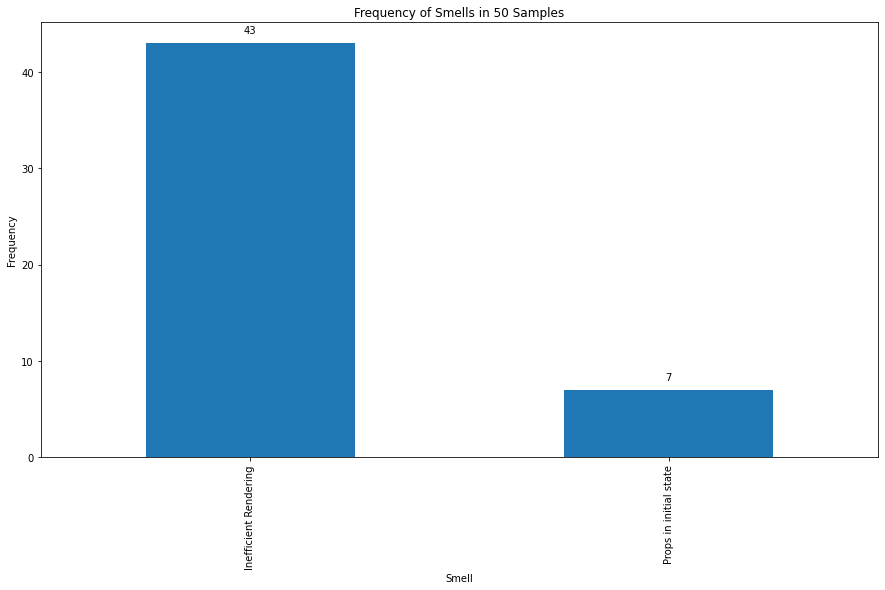

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Owner\Desktop\smell_samples_dataset.csv"
df = pd.read_csv(file_path)

#Checking the Frequency of each present Smell

smell_counts = df["Smell"].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 8))
ax = smell_counts.plot(kind="bar")

plt.xlabel("Smell")
plt.ylabel("Frequency")
plt.title("Frequency of Smells in 50 Samples")

# Display the number of each smell
for i, count in enumerate(smell_counts):
    ax.text(i, count + 1, str(count), ha="center", color="black")

plt.show()


In [3]:
#Extracting Code from the Dataset

file_path = r"C:\Users\Owner\Desktop\sample_smells_dataset.csv"
df = pd.read_csv(file_path)

row_number = int(input("Enter the Row Number: "))

if row_number >= 1 and row_number <= len(df):
    fpath = df.loc[row_number - 1, 'FPath']

    with open(fpath, "r") as file:
        code_lines = file.readlines()

    print("".join(code_lines))
else:
    print("Invalid Row number !!!")


Enter the Row Number: 50
class DatasourceControl extends React.PureComponent {
  constructor(props) {
    super(props);
    this.state = {
      showEditDatasourceModal: false,
      showChangeDatasourceModal: false,
      showSaveDatasetModal: false,
    };
  }

  onDatasourceSave = datasource => {
    this.props.actions.changeDatasource(datasource);
    const { temporalColumns, defaultTemporalColumn } =
      getTemporalColumns(datasource);
    const { columns } = datasource;
    // the current granularity_sqla might not be a temporal column anymore
    const timeCol = this.props.form_data?.granularity_sqla;
    const isGranularitySqalTemporal = columns.find(
      ({ column_name }) => column_name === timeCol,
    )?.is_dttm;
    // the current main_dttm_col might not be a temporal column anymore
    const isDefaultTemporal = columns.find(
      ({ column_name }) => column_name === defaultTemporalColumn,
    )?.is_dttm;

    // if the current granularity_sqla is empty or it is not a 